# Machine Learning Prediction

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [2]:
data = pd.read_csv('1830151.csv') #loading data
data.shape 

(50000, 19)

General info about data

In [3]:
data.describe() 

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999600e+04,50000.000000
mean,2019.200080,2.010718e+09,2.019247e+07,2.019250e+07,2.019265e+07,1.0,NaN,32411.668192,2.019250e+07,2.010119e+09,0.080820
std,0.400064,2.827267e+08,3.873712e+03,3.862553e+03,3.879063e+03,0.0,NaN,39973.567563,3.862947e+03,2.746868e+08,0.272561
min,2019.000000,1.928500e+09,2.018123e+07,2.018113e+07,2.018121e+07,1.0,NaN,0.270000,2.018113e+07,1.928500e+09,0.000000
25%,2019.000000,1.929234e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4719.135000,2.019042e+07,1.929234e+09,0.000000
50%,2019.000000,1.929807e+09,2.019080e+07,2.019081e+07,2.019082e+07,1.0,NaN,17362.555000,2.019081e+07,1.929807e+09,0.000000
75%,2019.000000,1.930396e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,46845.565000,2.019112e+07,1.930395e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020070e+07,1.0,NaN,792766.350000,2.020052e+07,2.960636e+09,1.000000


In [4]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S corp,NaN,2020.0,1.930855e+09,2020-05-04,20200503,20200504,20200519.0,USD,RV,1.0,NaN,142.89,20200504.0,NAA8,1.930855e+09,1
49996,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930584e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,19732.43,20200301.0,NAH4,1.930584e+09,1
49997,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930764e+09,2020-04-10,20200408,20200410,20200425.0,USD,RV,1.0,NaN,62295.39,20200410.0,NAH4,1.930764e+09,1
49998,U001,200799367,MCL corp,NaN,2020.0,1.930824e+09,2020-04-24,20200424,20200424,20200215.0,USD,RV,1.0,NaN,26738.53,20200131.0,NAA8,1.930824e+09,1


In [5]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [6]:
df=data.copy()

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0


Converting all dates to datetime format

In [8]:
def con_date_time(df):
    df['clear_date']=pd.to_datetime(df['clear_date'])
    df['posting_date']=pd.to_datetime(df['posting_date'])
    df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d', errors='ignore')
    df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d', errors='ignore')
    df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d', errors='ignore')
    df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d', errors='ignore')
    df['buisness_year']=df['buisness_year'].astype(int)
    return None

In [9]:
con_date_time(df)

In [10]:
df.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10,2019,1.929535e+09,2019-06-24,2019-06-24,2019-06-24,2019-07-09,USD,RV,1.0,NaN,52499.91,2019-06-24,NAA8,1.929535e+09,0


In [11]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

Dropping Extra document create date column and sorting for distribution

In [12]:
df.drop(['document_create_date'],axis=1,inplace=True)
df=df.sort_values(by='document_create_date.1',ignore_index=True)
df=df.rename(columns={'document_create_date.1':'document_create_date'})

In [13]:
data_train=df.loc[data['clear_date'].notna()]
data_train=data_train.reset_index(drop=True)
data_null_cleardate=df.loc[data['clear_date'].isna()]
data_null_cleardate=data_null_cleardate.reset_index(drop=True)

Removing anomalies in the data

In [14]:
df=data_train
df=(df.loc[df['document_create_date']<=df['posting_date']].loc[df['posting_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['clear_date']]).copy()

In [15]:
(df['due_in_date']==df['clear_date']).value_counts()

False    36033
True      9786
dtype: int64

In [16]:
df['due_duration']=(df['clear_date']-df['due_in_date']).dt.days
df = df.loc[df['due_duration']<10]
# df=df.drop(['clear_date'],axis=1)

### Initital EDA

In [17]:
drop = [] # list of columns to be dropped

In [18]:
for i in df.columns:
    if bool(list(df[i].isna().value_counts().index)[0]):
        print(i)  

area_business


In [19]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<100:
        print()
        print(df[i].value_counts())
    print()

business_code
6

U001    39585
CA02     3067
U013      499
U002      105
U005        8
U007        2
Name: business_code, dtype: int64

cust_number
1321

name_customer
3975

clear_date
391

buisness_year
2

2019    37674
2020     5592
Name: buisness_year, dtype: int64

doc_id
43266

posting_date
420

document_create_date
420

due_in_date
487

invoice_currency
2

USD    40198
CAD     3068
Name: invoice_currency, dtype: int64

document type
1

RV    43266
Name: document type, dtype: int64

posting_id
1

1.0    43266
Name: posting_id, dtype: int64

area_business
0

Series([], Name: area_business, dtype: int64)

total_open_amount
39301

baseline_create_date
429

cust_payment_terms
68

NAA8    17938
NAH4    11925
CA10     3019
NAC6     1561
NAM4     1290
        ...  
NAVC        1
NAUY        1
NATM        1
NAUN        1
90M7        1
Name: cust_payment_terms, Length: 68, dtype: int64

invoice_id
43266

isOpen
1

0    43266
Name: isOpen, dtype: int64

due_duration
75

 0     9786
 1     5

In [20]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                     float64
area_business                  float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
due_duration                     int64
dtype: object

In [21]:
dfc=df.select_dtypes(include=['float64','int64']).copy()

### Constant Features

In [22]:
sel = VarianceThreshold(threshold=0)
sel.fit(dfc) 
sum(sel.get_support())
len(dfc.columns[sel.get_support()])
print(
    len([
        x for x in dfc.columns
        if x not in dfc.columns[sel.get_support()]
    ]))

q=[x for x in dfc.columns if x not in dfc.columns[sel.get_support()]]
q

3


/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


['posting_id', 'area_business', 'isOpen']

In [23]:
for i in q:
    drop.append(i)

### Quasi Constant

In [24]:
sel = VarianceThreshold(threshold=0.4)
sel.fit(dfc) 
sum(sel.get_support())
len(dfc.columns[sel.get_support()])
print(
    len([
        x for x in dfc.columns
        if x not in dfc.columns[sel.get_support()]
    ]))

q=[x for x in dfc.columns if x not in dfc.columns[sel.get_support()]]
q

4


/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


['buisness_year', 'posting_id', 'area_business', 'isOpen']

## Splitting

In [25]:
x_train, x_test_init = train_test_split(
    df,
    test_size=0.3,
    shuffle=False)
x_train.shape,  x_test_init.shape

((30286, 19), (12980, 19))

In [26]:
x_val, x_test = train_test_split(
    x_test_init,
    test_size=0.5,
    shuffle=False)

x_val.shape, x_test.shape

((6490, 19), (6490, 19))

### Feature Engg

In [27]:
x_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'due_in_date', 'invoice_currency', 'document type', 'posting_id',
       'area_business', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen', 'due_duration'],
      dtype='object')

In [28]:
df=x_train.copy()
a=df
# Encoding String terms
code_business_code = {k: i for i, k in enumerate(a.business_code.unique(), 1)}
code_cust_payment_terms = {k: i for i, k in enumerate(a.cust_payment_terms.unique(), 1)}
code_cust_number = {k: i for i, k in enumerate(a.cust_number.unique(), 1)}
code_name_customer = {k: i for i, k in enumerate(a.name_customer.unique(), 1)}

def encoding(df_obj):
    df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)
    df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)
    df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)
    df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)
    return None

# creating fetures from date
def dates_feature(df_dates):
    df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week.astype(int)
    df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week.astype(int)
    df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week.astype(int)
    df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week.astype(int)
    return None

encoding(df)
dates_feature(df)


In [29]:
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)


In [30]:
for i in ['posting_date','document_create_date','due_in_date','baseline_create_date','name_customer','cust_number','cust_payment_terms','business_code']:
    drop.append(i)

In [31]:
# df

In [32]:
# df=x_train.copy()
mapper1=df.groupby('code_cust_number')['due_duration'].mean()
mapper2=df.groupby('code_name_customer')['due_duration'].mean()

In [33]:
mapper1

code_cust_number
1       0.383178
2       1.843206
3      -2.711538
4       0.855422
5       0.632184
          ...   
1213   -3.000000
1214    2.000000
1215    0.000000
1216    0.000000
1217    2.000000
Name: due_duration, Length: 1217, dtype: float64

In [34]:
mapper1=df.groupby('code_cust_number')['due_duration'].mean()
mapper2=df.groupby('code_name_customer')['due_duration'].mean()

df['cust_delay_mean']=df['code_cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['code_name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days

mappingData = [mapper1,mapper2]

In [35]:
df['conv_amt']=df['total_open_amount'].copy()
df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78

In [36]:
df['cust_number'].loc[df['cust_number'].str.isdigit()!=True]

854      CC3411
1659     CCCA02
1711     CCCA02
1756     CCCA02
1785     CCCA02
          ...  
31018    CCCA02
31141    CCU002
31186    CCCA02
31647    CC6000
32286    CC3411
Name: cust_number, Length: 279, dtype: object

<AxesSubplot:xlabel='cust_payment_terms', ylabel='count'>

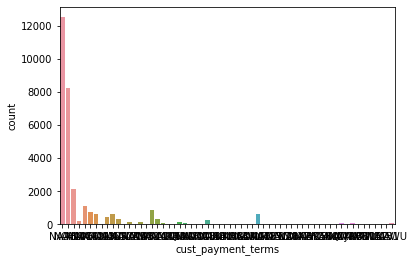

In [37]:
sns.countplot(x='cust_payment_terms',data=df)

<AxesSubplot:xlabel='business_code', ylabel='count'>

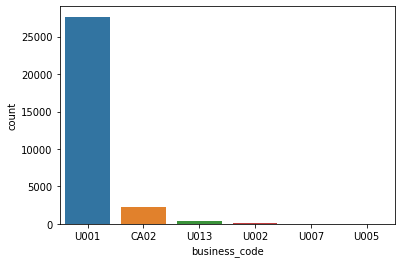

In [38]:
sns.countplot(x='business_code',data=df)

<AxesSubplot:xlabel='cust_number', ylabel='count'>

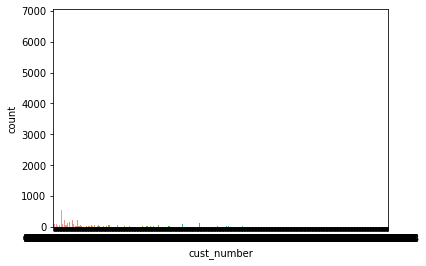

In [39]:
sns.countplot(x='cust_number',data=df)

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

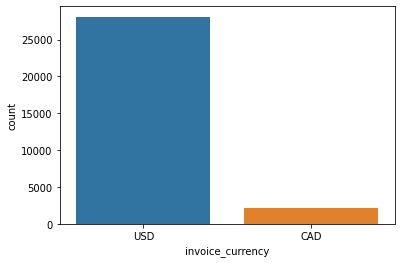

In [40]:
sns.countplot(x='invoice_currency',data=df)

In [41]:
corr=df.corr().abs()

u=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
u

<ipython-input-41-7c2248fed8e4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  u=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,due_duration,code_business_code,code_cust_payment_terms,...,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week,document_create_is_working,due_in_is_working,cust_delay_mean,cust_name_delay_mean,payment_time,conv_amt
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,NaN,NaN,NaN,0.191339,1.000000,NaN,0.174502,0.692824,0.052322,...,0.016022,0.013333,0.000891,0.014502,0.000342,0.061851,0.329189,0.271320,0.095962,0.114151
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,NaN,NaN,NaN,NaN,NaN,0.191339,NaN,0.104857,0.115000,0.115031,...,0.003341,0.007483,0.024732,0.000322,0.008597,0.012980,0.141921,0.134367,0.097827,0.991770
invoice_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174502,0.692824,0.052322,...,0.016022,0.013333,0.000891,0.014502,0.000342,0.061851,0.329189,0.271320,0.095962,0.114151
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
due_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125375,0.306280,...,0.005258,0.006462,0.003738,0.004008,0.005868,0.003195,0.530103,0.607445,0.321954,0.097683
code_business_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037475,...,0.011134,0.007018,0.011012,0.008903,0.016575,0.038802,0.236510,0.194236,0.077215,0.062030
code_cust_payment_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022157,0.010511,0.016865,0.018553,0.047658,0.041832,0.084857,0.121517,0.730556,0.117840


In [42]:
# drop

In [43]:

print([column for column in u.columns if any(u[column] ==1)])


['invoice_id', 'document_create_date_month', 'document_create_date_day', 'document_create_date_year', 'document_create_date_quarter', 'document_create_date_dayofweek', 'document_create_date_week']


In [44]:
# drop.append('invoice_id')

In [45]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<6:
        print(df[i].value_counts())
    print()

business_code
6

cust_number
1217

name_customer
3449

clear_date
270

buisness_year
1
2019    30286
Name: buisness_year, dtype: int64

doc_id
30286

posting_date
283

document_create_date
283

due_in_date
335

invoice_currency
2
USD    28089
CAD     2197
Name: invoice_currency, dtype: int64

document type
1
RV    30286
Name: document type, dtype: int64

posting_id
1
1.0    30286
Name: posting_id, dtype: int64

area_business
0
Series([], Name: area_business, dtype: int64)

total_open_amount
27671

baseline_create_date
291

cust_payment_terms
60

invoice_id
30286

isOpen
1
0    30286
Name: isOpen, dtype: int64

due_duration
73

code_business_code
6

code_cust_payment_terms
60

code_cust_number
1217

code_name_customer
3449

posting_date_month
11

posting_date_day
31

posting_date_year
2
2019    30157
2018      129
Name: posting_date_year, dtype: int64

posting_date_quarter
4
2    10265
3     9796
1     9243
4      982
Name: posting_date_quarter, dtype: int64

posting_date_dayofweek
7

p

In [46]:
drop.append('invoice_currency')
drop.append('document type')

In [47]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week,document_create_is_working,due_in_is_working,cust_delay_mean,cust_name_delay_mean,payment_time,conv_amt
1,U001,0200752302,KROGER corporation,2019-01-14,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,2018,4,6,52,0,1,0.383178,1.142857,15,48419.67
3,U001,0200744019,TARG corp,2019-01-11,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,2018,4,6,52,0,1,1.843206,1.724138,15,11309.19
4,U001,0200769623,WAL-MAR in,2019-01-09,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,2018,4,6,52,0,1,-2.711538,-2.765832,15,1248.12
5,U001,0200769623,WAL-MAR corp,2019-01-11,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,2018,4,6,52,0,1,-2.711538,-2.645358,15,1763.96
6,U001,0200706844,WINC,2019-01-15,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,2018,4,6,52,0,1,0.855422,0.857143,15,80358.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,U001,0200230690,DECA trust,2019-10-09,2019,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,USD,...,2019,4,1,40,1,1,-4.582938,-4.428571,0,6881.27
32290,U001,0200742791,QUI systems,2019-10-22,2019,1.929970e+09,2019-10-08,2019-10-08,2019-10-23,USD,...,2019,4,1,41,1,1,1.235294,4.333333,15,41882.94
32291,U001,0100058056,SIMPLO trust,2019-10-08,2019,1.929986e+09,2019-10-08,2019-10-08,2019-10-23,USD,...,2019,4,1,41,1,1,-11.250000,-15.000000,15,79.66
32292,U001,0200769623,WAL-MAR trust,2019-10-18,2019,1.929989e+09,2019-10-08,2019-10-08,2019-10-23,USD,...,2019,4,1,41,1,1,-2.711538,-2.597365,15,44844.87


In [48]:
drop

['posting_id',
 'area_business',
 'isOpen',
 'posting_date',
 'document_create_date',
 'due_in_date',
 'baseline_create_date',
 'name_customer',
 'cust_number',
 'cust_payment_terms',
 'business_code',
 'invoice_currency',
 'document type']

In [49]:
df=df.drop(drop,axis=1)

In [50]:
df.columns.value_counts().sum()

40

In [51]:
df.head(1)

,clear_date,buisness_year,doc_id,total_open_amount,invoice_id,due_duration,code_business_code,code_cust_payment_terms,code_cust_number,code_name_customer,...,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week,document_create_is_working,due_in_is_working,cust_delay_mean,cust_name_delay_mean,payment_time,conv_amt
1,2019-01-14,2019,1.928537e+09,48419.67,1.928537e+09,0,1,1,1,1,...,2018,4,6,52,0,1,0.383178,1.142857,15,48419.67


In [52]:
# def iqr(data):
#     Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
#     Q2 = np.percentile(data, 50, interpolation = 'midpoint')  
#     Q3 = np.percentile(data, 75, interpolation = 'midpoint')  
#     IQR = Q3 - Q1  
#     low_lim = Q1 - 1.5 * IQR 
#     up_lim = Q3 + 1.5 * IQR 
#     outlier=[]
#     for x in data:
#         if ((x> up_lim) or (x<low_lim)): 
#              outlier.append(x) 
#     print('outlier in the dataset is', len(outlier)) 
#     return low_lim,up_lim

In [53]:
# for i in df.columns:
#     print(i)
#     iqr(df[i])

In [54]:
modes = {}
for i in df.columns:
    modes[i]=df[i].mode()

In [55]:
Xtr=df.copy()

In [56]:
q=x_val.copy()

In [57]:
# q

In [58]:
# mapper1

In [59]:
# mapper1

In [60]:
df=q

encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['cust_delay_mean']=df['code_cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['code_name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days
df['conv_amt']=df['total_open_amount'].copy()
df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

40

In [61]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [62]:
Xval=df.copy()

In [63]:
Xtr_bkp=Xtr.copy()
Xval_bkp=Xval.copy()

In [64]:
Xtr=Xtr_bkp.copy()
Xval=Xval_bkp.copy()

Ytr= Xtr['due_duration'].copy()
Xtr.drop(['due_duration'],axis=1,inplace=True)

Yval= Xval['due_duration'].copy()
Xval.drop(['due_duration'],axis=1,inplace=True)

In [65]:
# Xval['cust_delay_mean'].unique()

In [66]:
# list(zip(list(Xtr.columns),[1]*len(list(Xtr.columns))))

In [67]:
feature_selection=[      ('buisness_year', 1),
                         ('doc_id', 1),
                         ('total_open_amount', 1),
                         ('code_business_code', 1),
                         ('code_cust_payment_terms', 1),
                         ('code_cust_number', 1),
                         ('code_name_customer', 1),
                         ('posting_date_month', 1),
                         ('posting_date_day', 1),
                         ('posting_date_year', 1),
                         ('posting_date_quarter', 1),
                         ('posting_date_dayofweek', 1),
                         ('posting_date_week', 1),
                         ('due_in_date_month', 1),
                         ('due_in_date_day', 1),
                         ('due_in_date_year', 1),
                         ('due_in_date_quarter', 1),
                         ('due_in_date_dayofweek', 1),
                         ('due_in_date_week', 1),
                         ('document_create_date_month', 1),
                         ('document_create_date_day', 1),
                         ('document_create_date_year', 1),
                         ('document_create_date_quarter', 1),
                         ('document_create_date_dayofweek', 1),
                         ('document_create_date_week', 1),
                         ('baseline_create_date_month', 1),
                         ('baseline_create_date_day', 1),
                         ('baseline_create_date_year', 1),
                         ('baseline_create_date_quarter', 1),
                         ('baseline_create_date_dayofweek', 1),
                         ('baseline_create_date_week', 1),
                         ('document_create_is_working', 1),
                         ('due_in_is_working', 1),
                         ('cust_delay_mean', 1),
                         ('cust_name_delay_mean', 1),
                         ('payment_time', 1)]

In [68]:
feature=[]
for i in feature_selection:
    if i[1]==1:
        feature.append(i[0])

In [69]:
Xtr=Xtr[feature].copy()
Xval=Xval[feature].copy()

## Which model to select

In [73]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

### **1. Linear Regression**

# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **2. Support Vector Regression**

# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **3. Decision Tree Regressor**

# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **4. Random Forest Regressor**

# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))


In [72]:

### **5. XGB Regressor**

# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor(objective ='reg:squarederror')
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

## Score Card of the Models' Performances

In [74]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

# Score Card  # Accuracies are bad due to low time
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,13.675410,0.263594
1,Support Vector Regression,18.502292,0.003672
2,Decision Tree Regressor,19.752696,-0.063661
3,Random Forest Regressor,10.793583,0.418778
4,XGB Regressor,14.843272,0.200706


Selecting the model

## Random Forest

In [75]:
MSE_Score = []
R2_Score = []
Algorithm = []
MAE_Score = []
RMSE_Score = []
isTrue = []
isFalse = []
AllFeatures = []

In [76]:
Xtr=Xtr_bkp.copy()
Xval=Xval_bkp.copy()

In [77]:
# Xtr_bkp

In [78]:
Ytr= Xtr['due_duration'].copy()
Xtr.drop(['due_duration'],axis=1,inplace=True)

In [79]:
Yval= Xval['due_duration'].copy()
Xval.drop(['due_duration'],axis=1,inplace=True)

In [80]:
# list(zip(list(Xtr.columns),[1]*len(list(Xtr.columns))))

In [81]:
feature_selection=[      ('buisness_year', 0),
                         ('doc_id', 0),
                         ('document type', 0),
                         ('posting_id', 0),
                         ('total_open_amount', 0),
                         ('invoice_id', 0),
                         ('conv_amt', 1),
                         ('cust_delay_mean', 1),
                         ('cust_name_delay_mean', 0),
                         ('payment_time', 1),
                         ('code_business_code', 0),
                         ('code_cust_payment_terms', 1),
                         ('code_cust_number', 1),
                         ('code_name_customer', 0),
                         ('posting_date_month', 1),
                         ('posting_date_day', 1),
                         ('posting_date_year', 0),
                         ('posting_date_quarter', 0),
                         ('posting_date_dayofweek', 0),
                         ('posting_date_week', 0),
                         ('due_in_date_month', 1),
                         ('due_in_date_day', 1),
                         ('due_in_date_year', 0),
                         ('due_in_date_quarter', 1),
                         ('due_in_date_dayofweek', 1),
                         ('due_in_date_week', 0),
                         ('document_create_date_month', 1),
                         ('document_create_date_day', 1),
                         ('document_create_date_year', 0),
                         ('document_create_date_quarter', 1),
                         ('document_create_date_dayofweek', 1),
                         ('document_create_date_week', 0),
                         ('baseline_create_date_month', 1),
                         ('baseline_create_date_day', 1),
                         ('baseline_create_date_year', 0),
                         ('baseline_create_date_quarter', 0),
                         ('baseline_create_date_dayofweek', 0),
                         ('baseline_create_date_week', 0),
                         ('document_create_is_working', 1),
                         ('due_in_is_working', 1)]

In [82]:
feature=[]
for i in feature_selection:
    if i[1]==1:
        feature.append(i[0])

In [83]:
# with open("features", 'wb') as f:
#     pickle.dump(feature, f)

In [84]:
AllFeatures.append(feature)

In [85]:
# Xval.columns

In [86]:
# Xtr.columns

In [87]:
Xtr=Xtr[feature].copy()
Xval=Xval[feature].copy()

In [88]:
# Xtr

In [89]:
def stan(a,n):
    if n==1:
        scaler = StandardScaler()
    elif n==2:
        scaler = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
    return scaler

In [90]:
df=Xtr
scaler=stan(df,1)
scaler.fit(df)
Xtr=scaler.transform(df)
df=Xval
scaler=stan(df,1)
scaler.fit(df)
Xval=scaler.transform(df)

In [91]:
valS=[]
TrS=[]
n_e=[]
m_d=[]
m_s=[]
m_l=[]

In [92]:
n_e.append(45)
m_d.append(55)
m_s.append(25)
m_l.append(15)

In [93]:
clf = RandomForestRegressor(n_estimators=n_e[-1],max_depth=m_d[-1],min_samples_leaf=m_s[-1],min_samples_split=m_l[-1])
qwerty=clf.fit(Xtr, Ytr)

In [94]:
print(qwerty.score(Xval, Yval))
valS.append(qwerty.score(Xval, Yval))
TrS.append(qwerty.score(Xtr, Ytr))
qwerty.score(Xtr, Ytr)

0.4074956928062733


0.7284642484004407

In [95]:
print(qwerty.score(Xval, Yval))
valS.append(qwerty.score(Xval, Yval))
TrS.append(qwerty.score(Xtr, Ytr))
qwerty.score(Xtr, Ytr)

0.4074956928062733


0.7284642484004407

In [96]:
pd.DataFrame(list(zip(valS,TrS,n_e,m_d,m_s,m_l)))

,0,1,2,3,4,5
0,0.407496,0.728464,45,55,25,15


In [97]:
predicted1 = clf.predict(Xtr)
predicted = clf.predict(Xval)
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))
MAE_Score.append(mean_absolute_error(Yval, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Yval, predicted)))
A=((abs((pd.Series(np.around(predicted)).astype(int)-Yval.reset_index(drop=True))))<4).value_counts().to_frame().T
for i in A.columns:
    if i==True:
        isTrue.append(int(A[i]))
    else:
        isFalse.append(int(A[i]))

In [98]:
pd.DataFrame(Yval)

,due_duration
32294,0
32295,-2
32296,5
32297,-1
32298,0
...,...
39086,0
39087,6
39088,0
39089,0


In [99]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(MSE_Score,RMSE_Score, R2_Score,MAE_Score,isTrue,isFalse,AllFeatures,valS,TrS,n_e,m_d,m_s,m_l)), columns = ['MSE_Score','RMSE_Score', 'R2_Score','MAE_Score','isTrue','isFalse','Allfeatures','valS','TrS','n_e','m_d','m_s','m_l'])

In [100]:
# Score Card
Comparison[['MSE_Score','RMSE_Score', 'R2_Score','MAE_Score','isTrue','isFalse']]

,MSE_Score,RMSE_Score,R2_Score,MAE_Score,isTrue,isFalse
0,11.003093,3.317091,0.407496,1.972864,5459,1031


## Test Set

In [102]:
Xte=x_test.copy()

In [103]:
# x

In [104]:
# x_test.reset_index().loc[(abs((pd.Series(np.around(predicted)).astype(int)-Yte.reset_index(drop=True))))>4].describe()

In [105]:
df=Xte
encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['conv_amt']=df['total_open_amount'].copy()

df['cust_delay_mean']=df['code_cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['code_name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days

df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

40

In [106]:
from datetime import datetime, timedelta 

In [107]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [108]:
Yte= Xte['due_duration'].copy()
Xte.drop(['due_duration'],axis=1,inplace=True)

In [109]:
Xte=df.copy()
Xte=Xte[feature].copy()

In [110]:
df=Xte
scaler=stan(df,1)
scaler.fit(df)
Xte=scaler.transform(df)

In [111]:
# predicted1 = clf.predict(Xtr)
index=[]
predicted = clf.predict(Xte)

print(mean_squared_error(Yte, predicted))
print(r2_score(Yte, predicted))
print(mean_absolute_error(Yte, predicted))
print(np.sqrt(mean_squared_error(Yte, predicted)))
A=((abs((pd.Series(np.around(predicted)).astype(int)-Yte.reset_index(drop=True))))<4).value_counts().to_frame().T
for i in A.columns:
    if i==True:
        print('True',int(A[i]))
    else:
        index.append(i)
        print('False',int(A[i]))

23.144018275319887
0.38703476033892226
2.2277269733618748
4.810823035128177
True 5432
False 1058


In [112]:
# predicted1 = clf.predict(Xtr)
index=[]
predicted = clf.predict(Xte)

print(mean_squared_error(Yte, predicted))
print(r2_score(Yte, predicted))
print(mean_absolute_error(Yte, predicted))
print(np.sqrt(mean_squared_error(Yte, predicted)))
A=((abs((pd.Series(np.around(predicted)).astype(int)-Yte.reset_index(drop=True))))<4).value_counts().to_frame().T
for i in A.columns:
    if i==True:
        print('True',int(A[i]))
    else:
        index.append(i)
        print('False',int(A[i]))

23.144018275319887
0.38703476033892226
2.2277269733618748
4.810823035128177
True 5432
False 1058


In [113]:
((abs((pd.Series(np.around(predicted)).astype(int)-Yte.reset_index(drop=True))))<1).unique()

array([False,  True])

In [114]:
pd.DataFrame(Yte)

,due_duration
39091,2
39092,0
39093,4
39094,0
39095,-4
...,...
45952,5
45953,0
45954,2
45955,0


In [115]:
pd.DataFrame(predicted)

,0
0,-3.543962
1,0.510564
2,4.180327
3,0.289940
4,-3.323154
...,...
6485,8.011195
6486,0.225051
6487,0.277539
6488,0.636473


In [116]:
# Xte.reset_index().loc[(abs((pd.Series(np.around(predicted)).astype(int)-Yte.reset_index(drop=True))))>4].describe()

## Prediction on main data

In [117]:
df=data_null_cleardate.copy()

In [118]:
df=df.drop(['clear_date'],axis=1)

In [119]:
df['cust_delay_mean']=df['cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days
encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['conv_amt']=df['total_open_amount'].copy()

df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

38

In [120]:
df.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id',
       'cust_delay_mean', 'cust_name_delay_mean', 'payment_time',
       'code_business_code', 'code_cust_payment_terms', 'code_cust_number',
       'code_name_customer', 'posting_date_month', 'posting_date_day',
       'posting_date_year', 'posting_date_quarter', 'posting_date_dayofweek',
       'posting_date_week', 'due_in_date_month', 'due_in_date_day',
       'due_in_date_year', 'due_in_date_quarter', 'due_in_date_dayofweek',
       'due_in_date_week', 'document_create_date_month',
       'document_create_date_day', 'document_create_date_year',
       'document_create_date_quarter', 'document_create_date_dayofweek',
       'document_create_date_week', 'baseline_create_date_month',
       'baseline_create_date_day', 'baseline_create_date_year',
       'baseline_create_date_quarter', 'baseline_create_date_dayofweek',
       'baseline_create_date_week', 'document_create_is_working',
       'due_in_is_working', 'conv_

In [121]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [122]:
XM=df.copy()
XM=XM[feature].copy()

In [123]:
df=XM
scaler=stan(df,1)
scaler.fit(df)
XM=scaler.transform(df)

In [124]:
predicted = clf.predict(XM)

In [125]:
qwer=pd.DataFrame(np.around(predicted).astype(np.int64))

In [126]:
qwer[0]= qwer[0].astype(str) + ' day' 

In [127]:
qwer

,0
0,0 day
1,0 day
2,-1 day
3,0 day
4,-1 day
...,...
4036,-2 day
4037,-1 day
4038,0 day
4039,-1 day


In [128]:
qwer=pd.to_timedelta(qwer[0])

In [129]:
qwer.value_counts()

-1 days     3089
0 days       454
-2 days      170
-17 days      82
-6 days       56
-12 days      49
-5 days       30
-11 days      26
-3 days       21
1 days        14
-7 days       11
-4 days       10
-16 days       8
-18 days       7
-10 days       5
-13 days       5
-9 days        3
-15 days       1
Name: 0, dtype: int64

In [130]:
Final_dates=data_null_cleardate['due_in_date'] + qwer

In [131]:
data_null_cleardate['due_in_date']

0      2020-03-13
1      2020-03-13
2      2020-03-13
3      2020-03-13
4      2020-03-13
          ...    
4036   2020-05-29
4037   2020-06-02
4038   2020-05-29
4039   2020-06-04
4040   2020-06-21
Name: due_in_date, Length: 4041, dtype: datetime64[ns]

In [132]:
Final_dates

0      2020-03-13
1      2020-03-13
2      2020-03-12
3      2020-03-13
4      2020-03-12
          ...    
4036   2020-05-27
4037   2020-06-01
4038   2020-05-29
4039   2020-06-03
4040   2020-06-14
Length: 4041, dtype: datetime64[ns]

In [133]:
data_null_cleardate.loc[data_null_cleardate["due_in_date"]==Final_dates]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200875006,KROGER,NaT,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,27511.32,2020-02-27,NAA8,1.930577e+09,1
1,U001,0200707822,PUBLI co,NaT,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,30297.26,2020-02-27,NAA8,1.930577e+09,1
3,U001,0200720238,WOODM foundation,NaT,2020,1.930571e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,26007.26,2020-02-27,NAA8,1.930571e+09,1
5,U001,0200769623,WAL-MAR systems,NaT,2020,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,1898.20,2020-02-27,NAH4,1.930570e+09,1
7,U001,0200794332,COST corporation,NaT,2020,1.930567e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,3468.12,2020-02-27,NAAX,1.930567e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,U001,200769623,WAL-MAR co,NaT,2020,1.930886e+09,2020-05-12,2020-05-12,2020-05-27,USD,RV,1.0,NaN,2352.97,2020-05-12,NAH4,1.930886e+09,1
4030,U001,200769623,WAL-MAR corporation,NaT,2020,1.930887e+09,2020-05-12,2020-05-12,2020-05-27,USD,RV,1.0,NaN,2661.74,2020-05-12,NAH4,1.930887e+09,1
4031,U001,200769623,WAL-MAR co,NaT,2020,1.930893e+09,2020-05-12,2020-05-12,2020-05-27,USD,RV,1.0,NaN,943.12,2020-05-12,NAH4,1.930893e+09,1
4035,CA02,0140104429,COSTCO trust,NaT,2020,2.960634e+09,2020-05-13,2020-05-13,2020-05-27,CAD,RV,1.0,NaN,4402.77,2020-05-17,CA10,2.960634e+09,1
